## Intern- Archita Negi ##
# Exploratory Data Analysis - Retail
(Level - Beginner)

Perform ‘Exploratory Data Analysis’ on dataset 'SampleSuperstore'

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Reading the data frame into the memory
df=pd.read_csv('SampleSuperstore.csv')
df.shape

(9994, 13)

In [28]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
#Checking the null values in each column
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


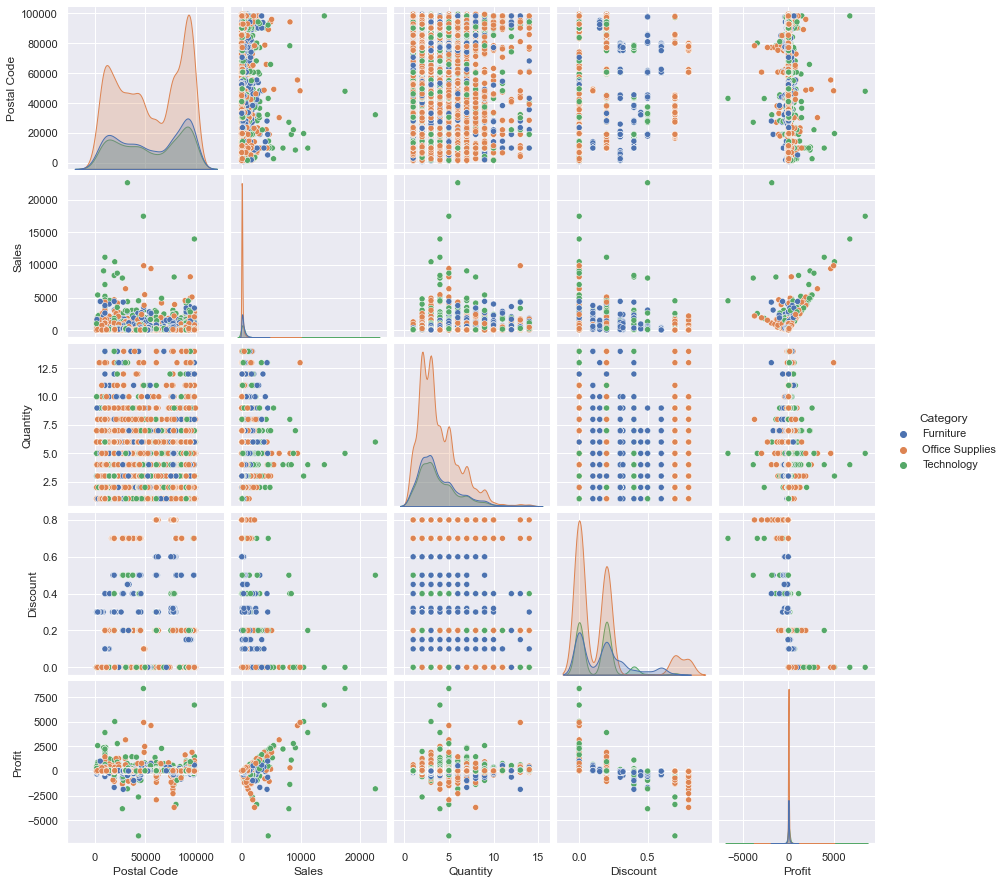

In [29]:
#Observing the relation between different numeric variables
sns.pairplot(df,hue='Category')

<AxesSubplot:>

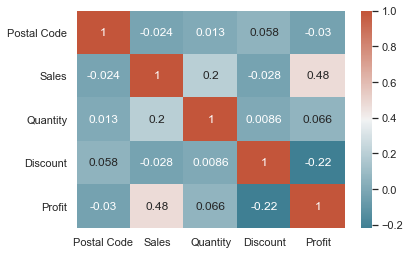

In [7]:
# calculate correlation matrix
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

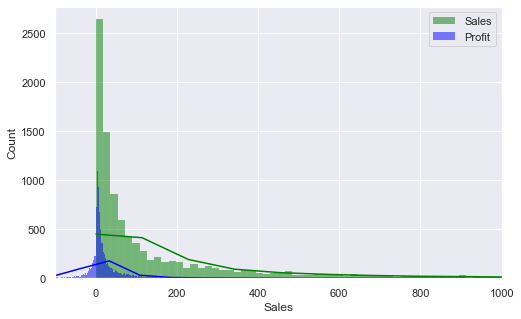

In [25]:
#Distribution of sales and profit
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'],color='green',label='Sales',kde=True)
sns.histplot(df['Profit'],color='Blue',label='Profit',kde=True)
plt.xlim([-100,1000])
plt.legend()

# Dealings of various state and regions

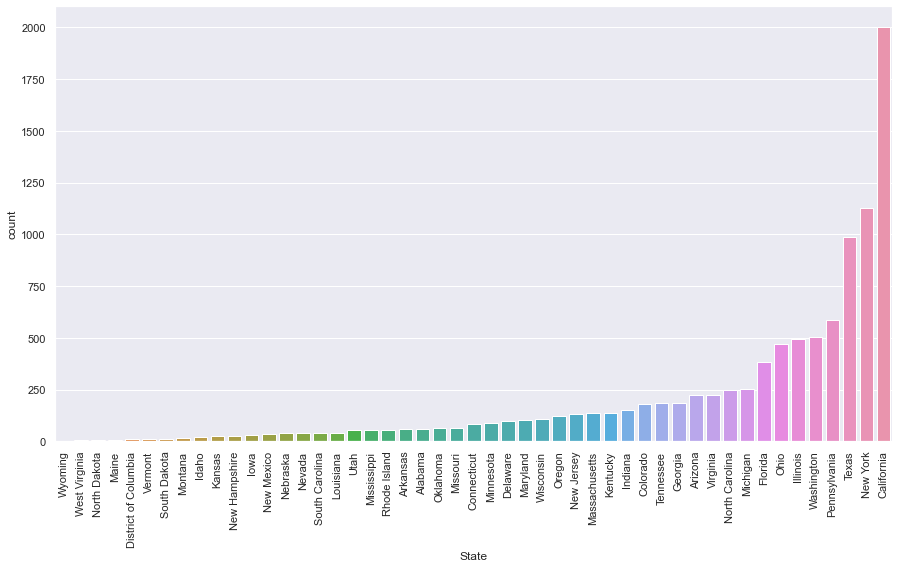

In [51]:
#Dealings statewise
order=df.groupby('State')['State'].count().sort_values().index
plt.subplots(figsize=(15,8))
sns.countplot(x="State",data=df,order=order)
plt.xticks(rotation=90)
plt.show()

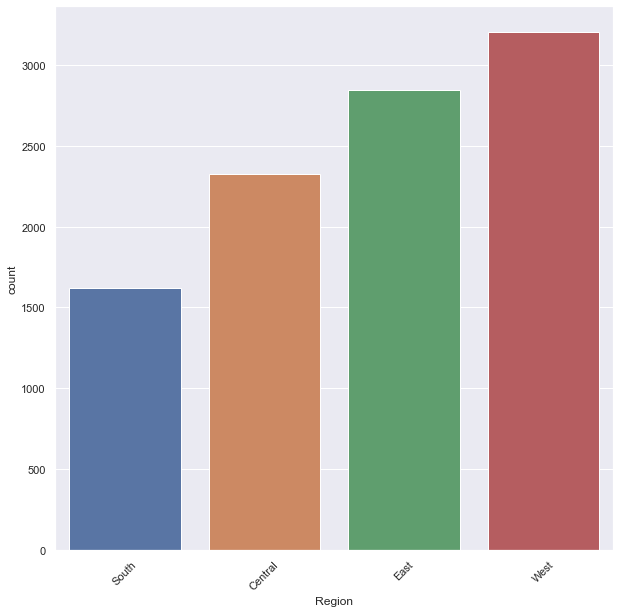

In [47]:
#Dealings Regionwise
order=df.groupby('Region')['Region'].count().sort_values().index
plt.subplots(figsize=(10,10))
sns.countplot(x="Region",data=df,order=order)
plt.xticks(rotation=45)
plt.show()

# Dependence of Profit on various factors

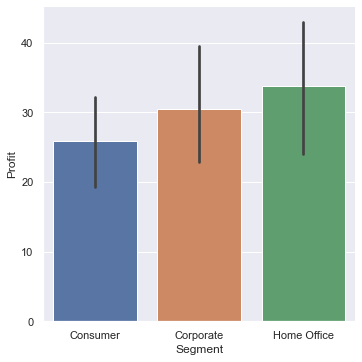

In [52]:
#Dependence of Profit on Segments
sns.catplot(x="Segment",y="Profit",data=df,kind='bar')

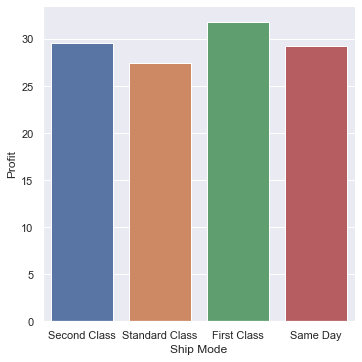

In [11]:
#Dependence of Profit on Shipping mode
sns.catplot(x="Ship Mode",y="Profit",data=df,kind='bar',ci=None)

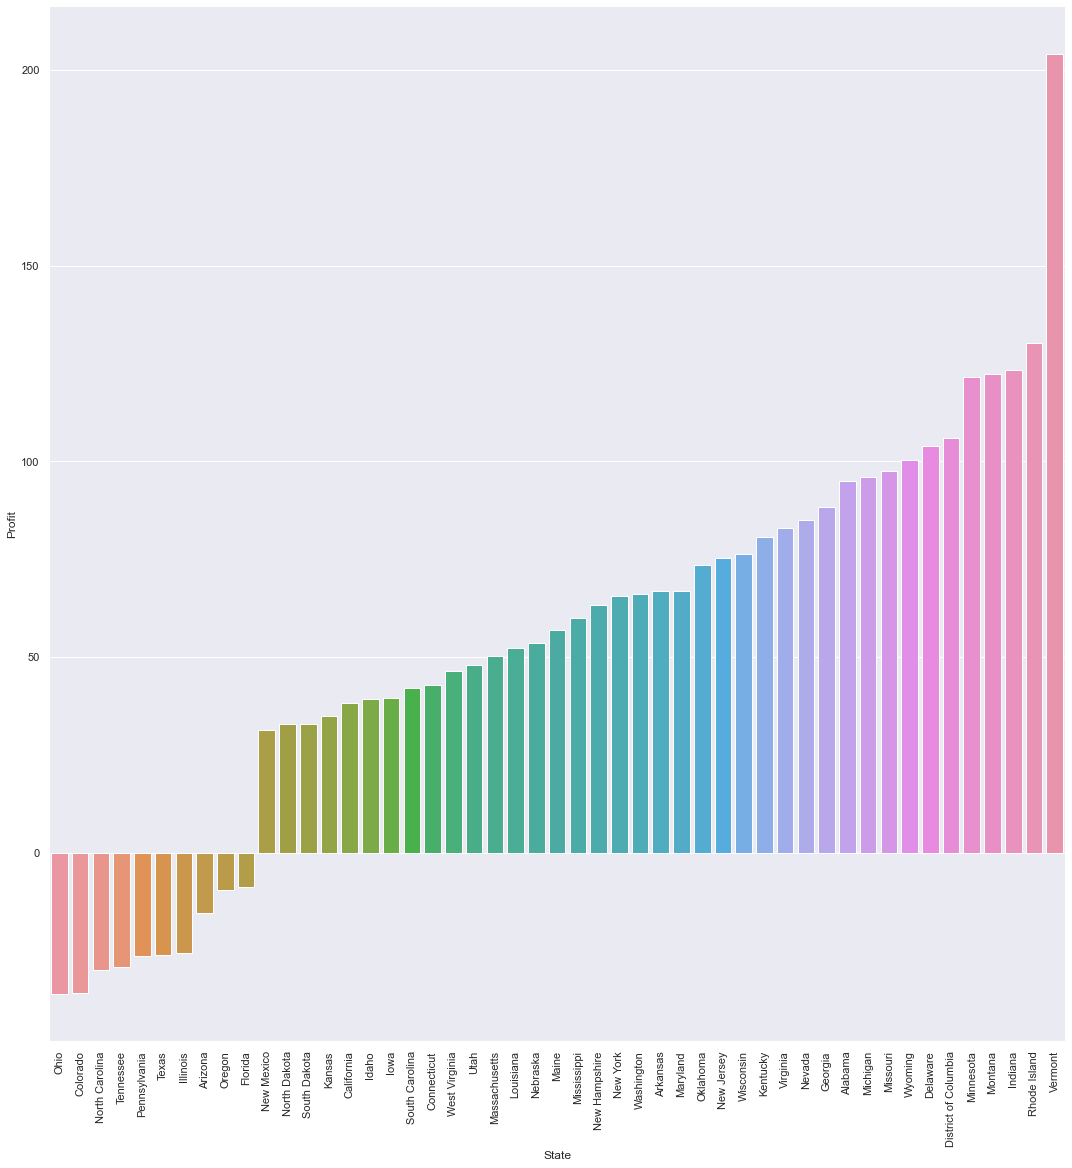

In [49]:
#Dependence of Profit on State
order= df.groupby(["State"])["Profit"].mean().sort_values().index
sns.catplot(x="State",y="Profit",data=df,kind='bar',ci=None,height=15,order=order)
plt.xticks(rotation=90)
plt.show()

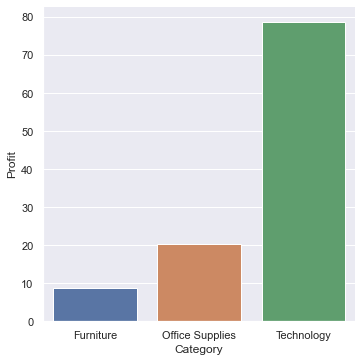

In [13]:
#Dependence of Profit on Category
sns.catplot(x="Category",y="Profit",data=df,kind='bar',ci=None)

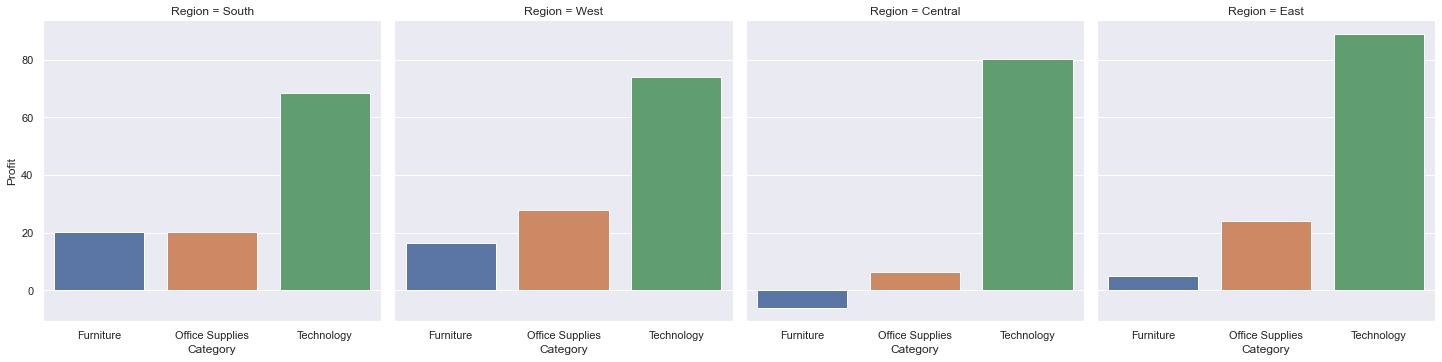

In [14]:
#Dependence of Profit on Category on different regions
sns.catplot(x="Category",y="Profit",data=df,kind='bar',ci=None,col="Region")

# Dependence of sales on various factors

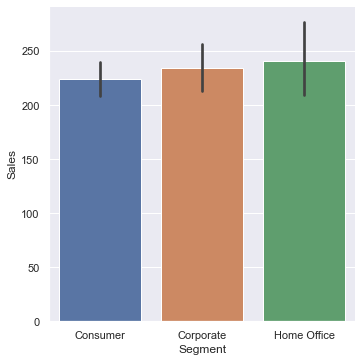

In [53]:
#Dependence of Sales on Segment
sns.catplot(x="Segment",y="Sales",data=df,kind='bar')

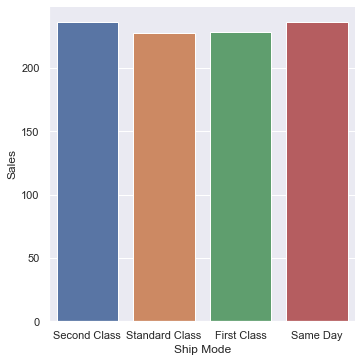

In [54]:
#Dependence of Sales on Shipping mode
sns.catplot(x="Ship Mode",y="Sales",data=df,kind='bar',ci=None)

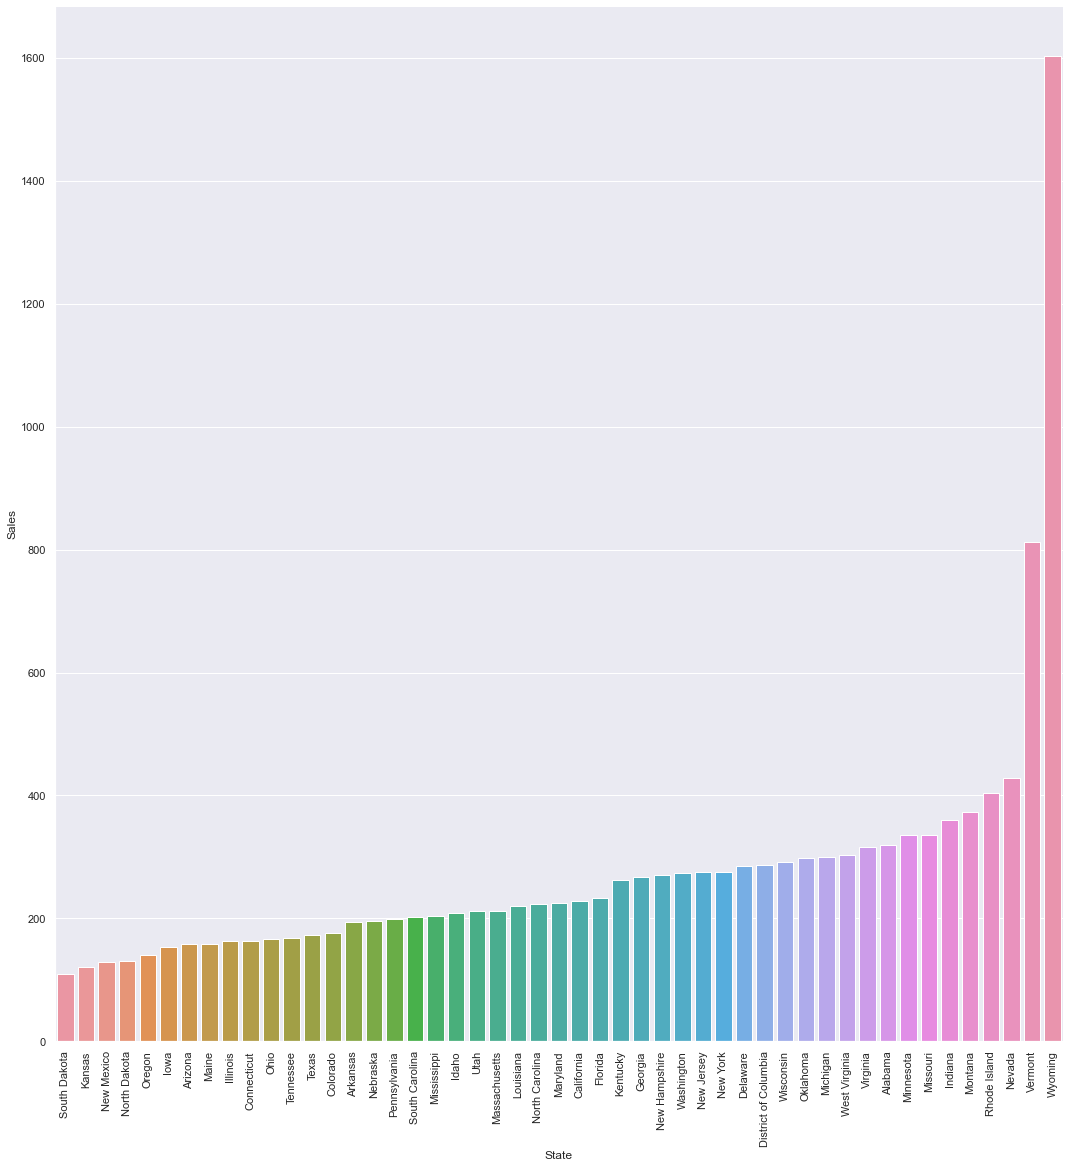

In [55]:
#Dependence of Sales on States
order= df.groupby(["State"])["Sales"].mean().sort_values().index
sns.catplot(x="State",y="Sales",data=df,kind='bar',ci=None,height=15,order=order)
plt.xticks(rotation=90)
plt.show()

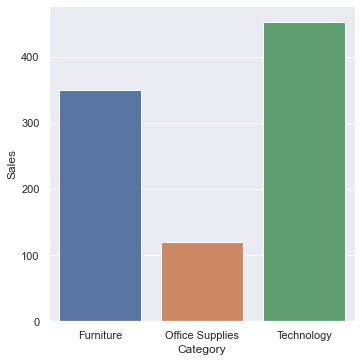

In [56]:
#Dependence of Sales on Category
sns.catplot(x="Category",y="Sales",data=df,kind='bar',ci=None)

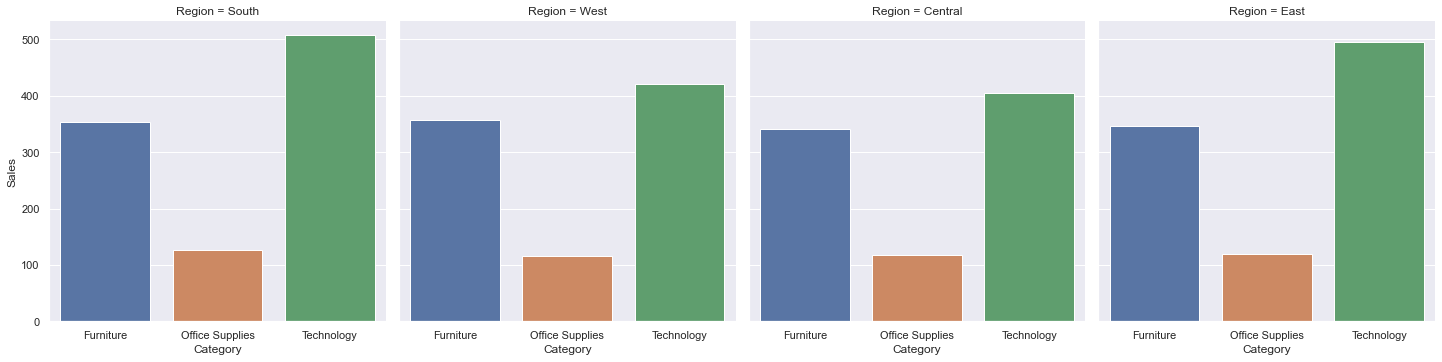

In [57]:
#Dependence of Sales on Category in different regions
sns.catplot(x="Category",y="Sales",data=df,kind='bar',ci=None,col="Region")

# Conclusion: 
By performing exploratory data analysis on the dataset 'SampleSuperstore', we get following observations:
- Market is thriving in regions such as Texas, New York, California.States such as Wyoming,West Virginia,Maine,North Dakota have low sales. Steps need to be taken to increase the sales in such regions.
- Technology is booming field with highest number of sales.Sales is lower in office supplies category but the profit is lowest in Furniture.  
- Selling Furtinure in Central region is contributing to loss.
- Furtinure profits are dim in Eastern region compared to other regions and categories.
- Profits among different segment don't differ too much.
- Shipping mode does not have significant impact on sales or profits